In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
# mount google drive folder as possible module path
from google.colab import drive
drive.mount('/content/drive')
# mount point
import sys
sys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks/York/numeric_methods/green book/notebooks/modules')


Mounted at /content/drive


# Incremental Search Method

rootsearch

This function searches for a zero of the user-supplied function f(x) in the interval
(a,b) in increments of dx . It returns the bounds (x1,x2) of the root if the search
was successful; x1 = x2 = None indicates that no roots were detected. After the
first root (the root closest to a ) has been detected, rootsearch can be called again
with a replaced by x2 in order to find the next root. This can be repeated as long as
rootsearch detects a root.

In [4]:
## module rootsearch
''' x1,x2 = rootsearch(f,a,b,dx).
    Searches the interval (a,b) in increments dx for
    the bounds (x1,x2) of the smallest root of f(x). 
    Returns x1 = x2 = None if no roots were detected.
'''
from numpy import sign

def rootsearch(f,a,b,dx):
    x1 = a; f1 = f(a)
    x2 = a + dx; f2 = f(x2)
    while sign(f1) == sign(f2):
        if x1  >=  b: return None,None
        x1 = x2; f1 = f2
        x2 = x1 + dx; f2 = f(x2)
    else:
        return x1,x2


Example

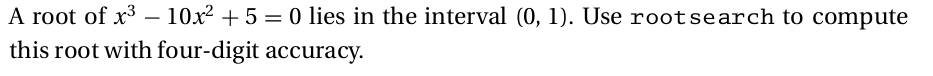

Solution

In [5]:
def f(x): 
    return x**3 - 10.0*x**2 + 5.0

x1 = 0.0
x2 = 1.0

for i in range(4):
    dx = (x2 - x1)/10.0
    x1,x2 = rootsearch(f,x1,x2,dx)

x = (x1 + x2)/2.0
print('x =', '{:6.4f}'.format(x))

x = 0.7346


bisection

This function uses the method of bisection to compute the root of f(x) = 0 that is
known to lie in the interval (x1,x2) . The number of bisections n required to reduce
the interval to tol is computed from Eq. (4.1). By setting switch = 1 , we force
the routine to check whether the magnitude of f(x) decreases with each interval
halving. If it does not, something may be wrong (probably the “root” is not a root
at all, but a pole), and root = None is returned. Because this feature is not always
desirable, the default value is switch = 0 .

In [6]:
## module bisection
''' root = bisection(f,x1,x2,switch=0,tol=1.0e-9).
    Finds a root of f(x) = 0 by bisection.
    The root must be bracketed in (x1,x2).
    Setting switch = 1 returns root = None if
    f(x) increases upon bisection.
'''    
from numpy import sign

def bisection(f,x1,x2,switch=1,tol=1.0e-9):
    f1 = f(x1)
    if f1 == 0.0: return x1
    f2 = f(x2)
    if f2 == 0.0: return x2
    if sign(f1) == sign(f2):
        error.err('Root is not bracketed')
    n = int(math.ceil(math.log(abs(x2 - x1)/tol)/math.log(2.0)))
    
    for i in range(n):
        x3 = 0.5*(x1 + x2); f3 = f(x3)
        if (switch == 1) and (abs(f3) > abs(f1)) \
                         and (abs(f3) > abs(f2)):
            return None   
        if f3 == 0.0: return x3
        if sign(f2)!= sign(f3): x1 = x3; f1 = f3
        else: x2 = x3; f2 = f3
    return (x1 + x2)/2.0

Example

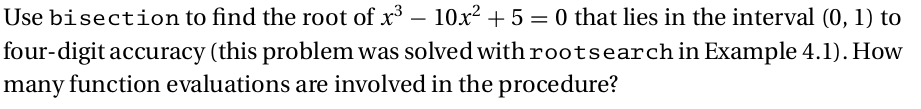

In [7]:
# Solution

def f(x): 
    return x**3 - 10.0*x**2 + 5.0

x = bisection(f, 0.0, 1.0, tol = 1.0e-4)
print('x =', '{:6.4f}'.format(x))

x = 0.7346


Example

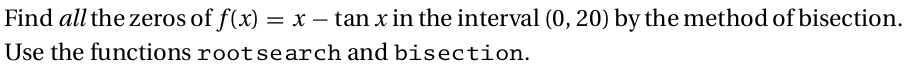

In [8]:
# Solution
from rootsearch import *
from bisection import *


def f(x): 
    return x - math.tan(x)


a,b,dx = (0.0, 20.0, 0.01)
print("The roots are:")

while True:
    x1,x2 = rootsearch(f,a,b,dx)
    if x1 != None:
        a = x2
        root = bisection(f,x1,x2,1)
        if root != None: 
            print(root)
    else:
        print("Done")
        break

The roots are:
0.0
4.493409458100745
7.725251837074637
10.904121659695917
14.06619391292308
17.220755272209537
Done


# Methods Based on Linear Interpolation

In [9]:
## module ridder
''' root = ridder(f,a,b,tol=1.0e-9).
    Finds a root of f(x) = 0 with Ridder's method.
    The root must be bracketed in (a,b).
'''
import error
import math
from numpy import sign

def ridder(f,a,b,tol=1.0e-9):   
    fa = f(a)
    if fa == 0.0: return a
    fb = f(b)
    if fb == 0.0: return b
    if sign(fa) == sign(fb): error.err('Root is not bracketed')
    for i in range(30):
      # Compute the improved root x from Ridder's formula
        c = 0.5*(a + b); fc = f(c)
        s = math.sqrt(fc**2 - fa*fb)
        if s == 0.0: return None
        dx = (c - a)*fc/s
        if (fa - fb) < 0.0: dx = -dx 
        x = c + dx; fx = f(x)
      # Test for convergence
        if i > 0:
            if abs(x - xOld) < tol*max(abs(x),1.0): return x
        xOld = x
      # Re-bracket the root as tightly as possible
        if sign(fc) == sign(fx): 
            if sign(fa)!= sign(fx): b = x; fb = fx
            else: a = x; fa = fx
        else:
            a = c; b = x; fa = fc; fb = fx
    return None
    print('Too many iterations')

Example

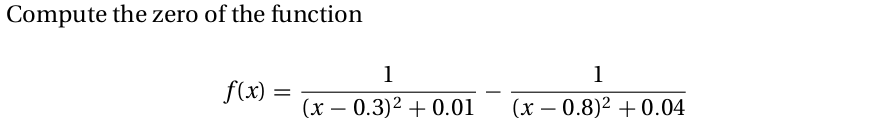

In [10]:
# Solution
from ridder import *

def f(x):
    a = (x - 0.3)**2 + 0.01
    b = (x - 0.8)**2 + 0.04
    return 1.0/a - 1.0/b


print("root =",ridder(f,0.0,1.0))

root = 0.5800000000000001


## Newton-Raphson Method

newtonRaphson

The following safe version of the Newton-Raphson method assumes that the root to
be computed is initially bracketed in (a,b) . The midpoint of the bracket is used
as the initial guess of the root. The brackets are updated after each iteration. If a
Newton-Raphson iteration does not stay within the brackets, it is disregarded and
replaced with bisection. Because newtonRaphson uses the function f(x) as well as
its derivative, function routines for both (denoted by f and df in the listing) must be
provided by the user

In [11]:
## module newtonRaphson
''' root = newtonRaphson(f,df,a,b,tol=1.0e-9).
    Finds a root of f(x) = 0 by combining the Newton-Raphson
    method with bisection. The root must be bracketed in (a,b).
    Calls user-supplied functions f(x) and its derivative df(x).   
'''    
def newtonRaphson(f,df,a,b,tol=1.0e-9):
    import error
    from numpy import sign
    
    fa = f(a)
    if fa == 0.0: return a
    fb = f(b)
    if fb == 0.0: return b
    if sign(fa) == sign(fb): error.err('Root is not bracketed')
    x = 0.5*(a + b)                    
    for i in range(30):
        fx = f(x)
        if fx == 0.0: return x
      # Tighten the brackets on the root 
        if sign(fa) != sign(fx): b = x  
        else: a = x
      # Try a Newton-Raphson step    
        dfx = df(x)
      # If division by zero, push x out of bounds
        try: dx = -fx/dfx
        except ZeroDivisionError: dx = b - a
        x = x + dx
      # If the result is outside the brackets, use bisection  
        if (b - x)*(x - a) < 0.0:  
            dx = 0.5*(b - a)                      
            x = a + dx
      # Check for convergence     
        if abs(dx) < tol*max(abs(b),1.0): return x
    print('Too many iterations in Newton-Raphson')


Example

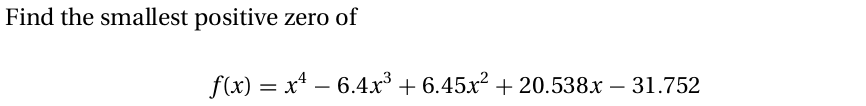

In [12]:
# Solution
def f(x): 
    return x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752

def df(x): 
    return 4.0*x**3 - 19.2*x**2 + 12.9*x + 20.538

def newtonRaphson(x,tol=1.0e-9):
    for i in range(30):
        dx = -f(x)/df(x)
        x = x + dx
        if abs(dx) < tol: 
            return x,i
    print("Too many iterations")

root,numIter = newtonRaphson(2.0)
print("Root =",root)
print("Number of iterations =", numIter)


Root = 2.0999999786199406
Number of iterations = 22


## Systems of Equations

newtonRaphson2

This function is an implementation of the Newton-Raphson method. The nested
function jacobian computes the Jacobian matrix from the finite difference approx-
imation

In [13]:
## module newtonRaphson2
''' soln = newtonRaphson2(f,x,tol=1.0e-9).
    Solves the simultaneous equations f(x) = 0 by
    the Newton-Raphson method using {x} as the initial
    guess. Note that {f} and {x} are vectors.
'''
from gaussPivot import *

def newtonRaphson2(f,x,tol=1.0e-9):
    
    def jacobian(f,x):
        h = 1.0e-4
        n = len(x)
        jac = np.zeros((n,n))
        f0 = f(x)
        for i in range(n):
            temp = x[i]
            x[i] = temp + h
            f1 = f(x)
            x[i] = temp
            jac[:,i] = (f1 - f0)/h
        return jac,f0
    flag = True
    for i in range(30):
        jac,f0 = jacobian(f,x)
        if flag:
            print("jac =\n", jac)
            print("f0 =", f0)
            flag = False
        if math.sqrt(np.dot(f0,f0)/len(x)) < tol:
            return x
        dx = gaussPivot(jac,-f0)
        x = x + dx
        if math.sqrt(np.dot(dx,dx)) < tol*max(max(abs(x)),1.0): return x
    print('Too many iterations')


Example

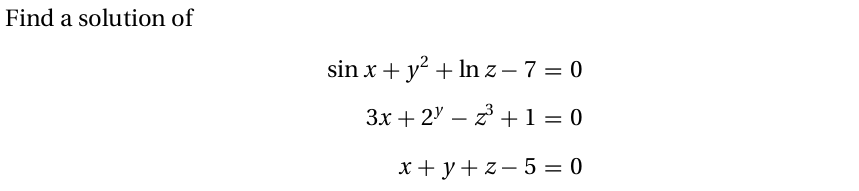

In [14]:
#Solution

def f(x):
    f = np.zeros(len(x))
    f[0] = math.sin(x[0]) + x[1]**2 + math.log(x[2]) - 7.0
    f[1] = 3.0*x[0] + 2.0**x[1] - x[2]**3 + 1.0
    f[2] = x[0] + x[1] + x[2] - 5.0
    return f

x = np.array([1.0, 1.0, 1.0])
print(newtonRaphson2(f,x))


jac =
 [[ 0.54026023  2.0001      0.99995   ]
 [ 3.          1.38634241 -3.00030001]
 [ 1.          1.          1.        ]]
f0 = [-5.15852902  5.         -2.        ]
[0.59905376 2.3959314  2.00501484]


---------------- Stopped here -------------- 
## Zeros of Polynomials

In [15]:
## module evalPoly
''' p,dp,ddp = evalPoly(a,x).
    Evaluates the polynomial
    p = a[0] + a[1]*x + a[2]*x^2 +...+ a[n]*x^n
    with its derivatives dp = p' and ddp = p"
    at x.
'''
def evalPoly(a,x):  
    n = len(a) - 1
    p = a[n]
    dp = 0.0 + 0.0j
    ddp = 0.0 + 0.0j
    for i in range(1,n+1):
        ddp = ddp*x + 2.0*dp
        dp = dp*x + p
        p = p*x + a[n-i]
    return p,dp,ddp


polyRoots

The function polyRoots in this module computes all the roots of P n (x) = 0, where
the polynomial P n (x) is defined by its coefficient array a = [a 0 , a 1 , . . . , a n ]. After the
first root is computed by the nested function laguerre , the polynomial is deflated
using deflPoly , and the next zero is computed by applying laguerre to the de-
flated polynomial. This process is repeated until all n roots have been found. If a
computed root has a very small imaginary part, it is more than likely that it repre-
sents roundoff error. Therefore, polyRoots replaces a tiny imaginary part by zero.

In [16]:
## module polyRoots
''' roots = polyRoots(a).
    Uses Laguerre's method to compute all the roots of
    a[0] + a[1]*x + a[2]*x^2 +...+ a[n]*x^n = 0.
    The roots are returned in the array 'roots',
'''    
from evalPoly import *
import numpy as np
import cmath
from random import random

def polyRoots(a,tol=1.0e-12):

    def laguerre(a,tol):
        x = random()   # Starting value (random number)
        n = len(a) - 1
        for i in range(30):
            p,dp,ddp = evalPoly(a,x)
            if abs(p) < tol: return x
            g = dp/p
            h = g*g - ddp/p
            f = cmath.sqrt((n - 1)*(n*h - g*g))
            if abs(g + f) > abs(g - f): dx = n/(g + f)
            else: dx = n/(g - f)
            x = x - dx
            if abs(dx) < tol: return x
        print('Too many iterations')

    def deflPoly(a,root):  # Deflates a polynomial
        n = len(a)-1
        b = [(0.0 + 0.0j)]*n
        b[n-1] = a[n]
        for i in range(n-2,-1,-1):
            b[i] = a[i+1] + root*b[i+1]
        return b

    n = len(a) - 1
    roots = np.zeros((n),dtype=complex)
    for i in range(n):
        x = laguerre(a,tol)
        if abs(x.imag) < tol: x = x.real
        roots[i] = x
        a = deflPoly(a,x)
    return roots


Example

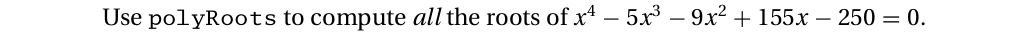

In [17]:
# Solution
c = np.array([-250.0,155.0,-9.0,-5.0,1.0])
print("Roots are:",polyRoots(c))

Roots are: [ 2.+0.j  4.-3.j  4.+3.j -5.+0.j]
